# Install all deps

In [1]:
from pypot.vrep import from_vrep
from pypot.creatures import PoppyHumanoid

In [2]:
poppy = PoppyHumanoid(simulator='vrep')

In [3]:
poppy.motors

[<DxlMotor name=l_elbow_y id=44 pos=0.0>,
 <DxlMotor name=r_hip_y id=23 pos=-0.0>,
 <DxlMotor name=r_knee_y id=24 pos=0.0>,
 <DxlMotor name=head_y id=37 pos=-3.1999999999999993>,
 <DxlMotor name=r_ankle_y id=25 pos=0.1>,
 <DxlMotor name=r_arm_z id=53 pos=-0.0>,
 <DxlMotor name=head_z id=36 pos=-0.0>,
 <DxlMotor name=r_shoulder_x id=52 pos=-1.0>,
 <DxlMotor name=r_shoulder_y id=51 pos=0.0>,
 <DxlMotor name=r_hip_z id=22 pos=-0.0>,
 <DxlMotor name=r_hip_x id=21 pos=0.3>,
 <DxlMotor name=r_elbow_y id=54 pos=0.0>,
 <DxlMotor name=l_arm_z id=43 pos=-0.0>,
 <DxlMotor name=l_hip_x id=11 pos=-0.3>,
 <DxlMotor name=l_hip_y id=13 pos=-2.0>,
 <DxlMotor name=l_hip_z id=12 pos=0.1>,
 <DxlMotor name=abs_x id=32 pos=0.0>,
 <DxlMotor name=abs_y id=31 pos=0.1>,
 <DxlMotor name=abs_z id=33 pos=0.0>,
 <DxlMotor name=l_ankle_y id=15 pos=0.1>,
 <DxlMotor name=bust_y id=34 pos=0.2>,
 <DxlMotor name=bust_x id=35 pos=0.0>,
 <DxlMotor name=l_knee_y id=14 pos=0.0>,
 <DxlMotor name=l_shoulder_x id=42 pos=0.40000

In [4]:
poppy.r_hip_z

<DxlMotor name=r_hip_z id=22 pos=-0.0>

In [5]:
poppy.head_y.present_position

-3.1000000000000014

In [6]:
[m.present_position for m in poppy.motors]

[0.0,
 -0.0,
 0.0,
 -3.1000000000000014,
 0.1,
 -0.0,
 -0.0,
 -1.0,
 0.0,
 -0.0,
 0.3,
 0.0,
 -0.0,
 -0.3,
 -2.0,
 0.1,
 0.0,
 0.1,
 -0.0,
 0.1,
 0.1,
 0.0,
 0.0,
 0.4000000000000057,
 -0.4000000000000057]

In [7]:
{m.name: m.present_position for m in poppy.motors}

{'l_elbow_y': -0.0,
 'r_hip_y': -0.0,
 'r_knee_y': 0.0,
 'head_y': -3.1000000000000014,
 'r_ankle_y': 0.2,
 'r_arm_z': -0.0,
 'head_z': 0.0,
 'r_shoulder_x': -1.0,
 'r_shoulder_y': 0.0,
 'r_hip_z': -0.0,
 'r_hip_x': 0.3,
 'r_elbow_y': 0.0,
 'l_arm_z': -0.0,
 'l_hip_x': -0.3,
 'l_hip_y': -2.0,
 'l_hip_z': 0.1,
 'abs_x': 0.0,
 'abs_y': 0.1,
 'abs_z': -0.0,
 'l_ankle_y': 0.1,
 'bust_y': 0.1,
 'bust_x': 0.0,
 'l_knee_y': -0.0,
 'l_shoulder_x': 0.4000000000000057,
 'l_shoulder_y': -0.4000000000000057}

In [8]:
poppy.alias


['r_leg',
 'l_leg_sagitall',
 'l_leg',
 'head',
 'r_arm',
 'legs',
 'torso',
 'r_leg_sagitall',
 'l_arm',
 'arms']

In [9]:
{m.name: m.present_position for m in poppy.r_leg}


{'r_hip_x': 0.3,
 'r_hip_z': -0.0,
 'r_hip_y': 0.0,
 'r_knee_y': 0.0,
 'r_ankle_y': 0.1}

In [10]:
poppy.head_z.goal_position = 0

In [11]:
poppy.head_z.goal_position = 90

In [12]:
poppy.head_z.goal_position = 0

In [20]:
for m in poppy.l_arm:
    m.goal_position = 30

In [19]:
poppy.r_shoulder_x.goal_position = -30
# poppy.r_shoulder_x.goal_position = -30

In [21]:
poppy.reset_simulation()

In [23]:
poppy.head_z.goto_position(0, 10)

In [29]:
poppy.head_z.goto_position(45, 2, wait=False)
poppy.head_y.goto_position(-30, 2, wait=True)

poppy.head_z.goto_position(0, 2, wait=True)

poppy.head_y.goto_position(20, 1, wait=True)

In [25]:
poppy.head_y.goto_behavior

'dummy'

In [38]:
poppy.head_y.goto_behavior = 'dummy'

In [30]:
import time

import math

amp = 30 # in degrees
freq = 0.5 # in Hz

t0 = time.time()

while True:
    t = time.time()
    
    # run for 10s
    if t - t0 > 10:
        break

    poppy.head_z.goal_position = amp * math.sin(2 * 3.14 * freq * t)
    
    time.sleep(0.04)


In [39]:
current, goal = [], []

t0 = time.time()

while True:
    t = time.time()
    
    # run for 5s
    if t - t0 > 10:
        break

    poppy.head_z.goal_position = amp * math.sin(2 * 3.14 * freq * t)

    
    current.append(poppy.head_z.present_position)
    goal.append(poppy.head_z.goal_position)
    
    time.sleep(0.04)

Populating the interactive namespace from numpy and matplotlib


/home/xyz/Program/miniconda3/envs/robot/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


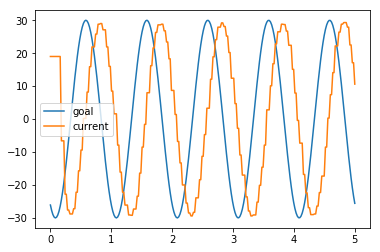

In [40]:
import pylab
%pylab inline

t = linspace(0, 5, len(current))
plot(t, goal)
plot(t, current)

legend(('goal', 'current'))

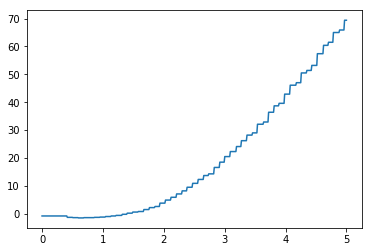

In [47]:
poppy.l_shoulder_x.goto_behavior = 'minjerk'

poppy.l_shoulder_x.goto_position(120, 5)

pos = []
t0 = time.time()

while time.time() - t0 < 5:
    pos.append(poppy.l_shoulder_x.present_position)
    
    time.sleep(0.01)
    
t = linspace(0, 5, len(pos))
plot(t, pos)


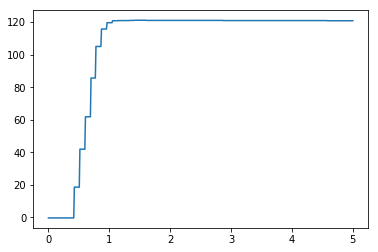

In [49]:
poppy.l_shoulder_x.goto_behavior = 'dummy'

poppy.l_shoulder_x.goto_position(120, 5)

pos = []
t0 = time.time()

while time.time() - t0 < 5:
    pos.append(poppy.l_shoulder_x.present_position)
    
    time.sleep(0.01)
    
t = linspace(0, 5, len(pos))
plot(t, pos)


In [48]:
poppy.l_shoulder_x.goto_position(0, 2)

In [50]:
poppy.get_object_position('l_forearm_visual')

[0.3205357789993286, 0.036079537123441696, 0.7700729370117188]

In [51]:
poppy.get_object_position('l_forearm_visual', 'head_visual')


[-0.1409701406955719, 0.03259110450744629, -0.2895839214324951]

In [52]:
reached_pt = []

for m in poppy.l_arm:
    m.goto_behavior = 'minjerk'

# We generate 25 random arm configuration
# and stores the reached position of the forearm
for _ in range(25):
    poppy.reset_simulation()
    
    # Generate a position by setting random position (within the angle limit) to each joint
    # This can be hacked to define other exploration
    pos = {m.name: randint(min(m.angle_limit), max(m.angle_limit)) for m in poppy.l_arm}    
    poppy.goto_position(pos, 2., wait=True)
        
    reached_pt.append(poppy.get_object_position('l_forearm_visual'))


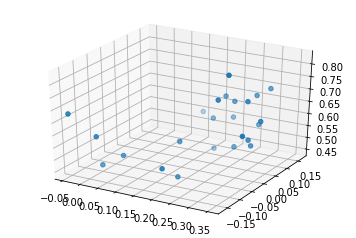

In [53]:
from mpl_toolkits.mplot3d import Axes3D

ax = axes(projection='3d')
ax.scatter(*array(reached_pt).T)

In [54]:
from pypot.primitive.utils import Sinus


In [55]:
sin_1 = Sinus(poppy, 25., [poppy.head_z, poppy.head_y], amp=15, freq=.15)


In [56]:
sin_1.start()

In [57]:
sin_2 = Sinus(poppy, 25., [poppy.head_z, ], amp=8, freq=.5)
sin_2.start()

In [58]:
from pypot.primitive import LoopPrimitive

class MotorPositionLogger(LoopPrimitive):
    def __init__(self, robot, refresh_freq, motor):
        LoopPrimitive.__init__(self, robot, refresh_freq)
        
        self.motor = getattr(self.robot, motor.name)

    # This code will be called each time the primitive is started
    def setup(self):
        self.positions = []
       
    # This method will be called at the predefined frequency
    def update(self):
        self.positions.append(self.motor.present_position)


In [59]:
logger = MotorPositionLogger(poppy, 50, poppy.head_z)


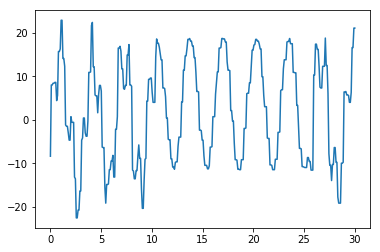

In [60]:
logger.start()

time.sleep(10)
sin_2.pause()

time.sleep(15)
sin_2.resume()

time.sleep(5)
logger.stop()

pos = logger.positions

plot(linspace(0, 30, len(pos)), pos)

In [61]:
for p in poppy.active_primitives:
    p.stop()

In [1]:
# http://nbviewer.jupyter.org/github/poppy-project/poppy-humanoid/blob/master/software/samples/notebooks/Controlling%20a%20Poppy%20humanoid%20in%20V-REP%20using%20pypot.ipynb
# https://github.com/poppy-project/community-notebooks/blob/master/demo/poppy-humanoid_Accessing%20pypot%20REST%20API%20through%20HTTP%20requests.ipynb


In [12]:
import itertools
from pypot.dynamixel.io import DxlIO

with DxlIO('/dev/ttyUSB0') as dxl_io:
    ids = dxl_io.scan([1, 2, 3, 4, 5])
    print(ids)
    print(dxl_io.get_present_position(ids))
    dxl_io.set_goal_position(dict(zip(ids, itertools.repeat(-90))))

[1]
(89.3,)
